### Problem Statement
- Understand various independent variables effect the Student's performance (test scores)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


#### Load Data and check top rows with dimensions 

In [2]:
df = pd.read_csv(r"../data/students.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

#### Data Checks
- Data type
- Duplicates
- Missing Value
- Unique value
- Statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Data Visualization

In [27]:
def get_count_plots(df, cols_list,n_row,n_col,x_size,y_size):
    fig, axs = plt.subplots(n_row, n_col, figsize=(x_size, y_size))
    i = 0
    for col in cols_list:
        i += 1
        plt.subplot(n_row,n_col,i)
        sns.countplot(data=df, x=col)
        plt.title(f'Value Counts of {col}')
        plt.xticks(rotation=45)
    fig.tight_layout() 
    plt.show()

In [40]:
sns.set_palette("crest")

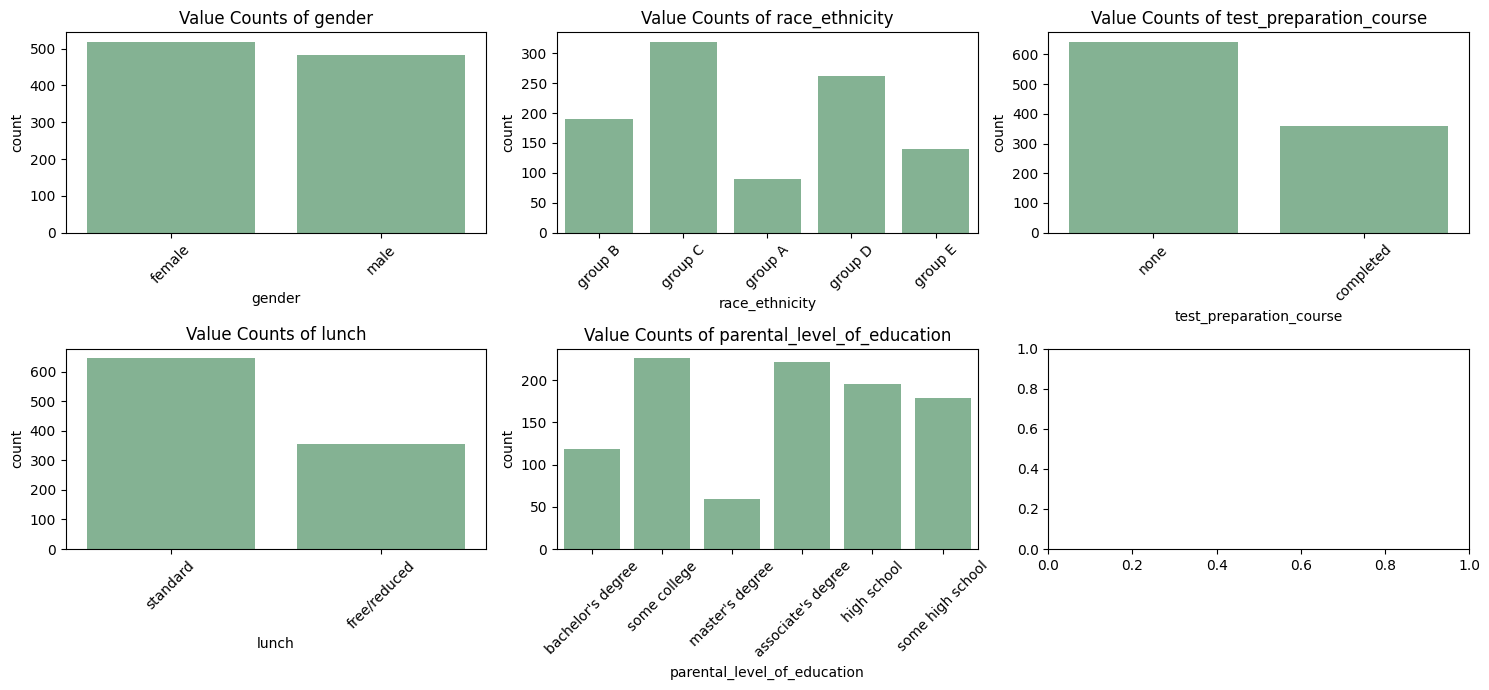

In [41]:
get_count_plots(df,['gender','race_ethnicity','test_preparation_course','lunch','parental_level_of_education'],2,3,15,7)